In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

def grayscale_and_pad(image_path):
    original_image = Image.open(image_path)
    grayscale_image = original_image.convert('L')
    target_width, target_height = 1024, 1024
    pad_width = (target_width - grayscale_image.width) // 2
    pad_height = (target_height - grayscale_image.height) // 2
    padded_image = Image.new('L', (target_width, target_height), color='white')
    padded_image.paste(grayscale_image, (pad_width, pad_height))
    image_array = np.array(padded_image)
    return image_array

# Load and preprocess the output image (grayscale and padded)
output_image_path = 'trippy_image.webp'
output_image = grayscale_and_pad(output_image_path)

# Display the image
plt.imshow(output_image, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()


ModuleNotFoundError: No module named 'dateutil.rrule'

In [82]:
import cv2

# Reshape the image to add a third dimension with size 1
reshaped_image = np.expand_dims(output_image, axis=2)

# Save or display the reshaped image
cv2.imwrite('reshaped_image.jpg', reshaped_image)
print(reshaped_image.shape)

(1024, 1024, 1)


In [96]:
import tensorflow.keras.layers as ll

def leaky_relu(x):
    return tf.nn.leaky_relu(x, alpha=0.1)

def sigmoid_scaled(x):
    return 255 * tf.sigmoid(x)
def absolute(x):
    return tf.abs(x)


model = tf.keras.models.Sequential([
    ll.BatchNormalization(input_shape=(1024, 1024, 8)),
    ll.Conv2D(8, (1,1), activation=absolute),
    ll.Conv2D(16, (1,1), activation=leaky_relu),
    ll.Conv2D(32, (1,1), activation=leaky_relu),
    ll.Conv2D(32, (1,1), activation=leaky_relu),
    ll.Conv2D(32, (1,1), activation=leaky_relu),
    ll.Conv2D(32, (1,1), activation=leaky_relu),
    ll.Conv2D(16, (1,1), activation=leaky_relu),
    ll.Conv2D(16, (1,1), activation=leaky_relu),
    ll.Conv2D(16, (1,1), activation=leaky_relu),
    ll.Conv2D(16, (1,1), activation=leaky_relu),
    ll.Conv2D(16, (1,1), activation=leaky_relu),
    ll.Conv2D(8, (1,1), activation=leaky_relu),
    ll.Conv2D(1, (1,1), activation=sigmoid_scaled),
])

model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())




Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_12          │ (None, 1024, 1024, 8)  │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_170 (Conv2D)             │ (None, 1024, 1024, 8)  │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_171 (Conv2D)             │ (None, 1024, 1024, 16) │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_172 (Conv2D)             │ (None, 1024, 1024, 32) │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_173 (Conv2D)             │ (None, 1024, 1024, 32) │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_174 (Conv2D)             │ (None, 1024, 1024, 32) │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_175 (Conv2D)             │ (None, 1024, 1024, 32) │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_176 (Conv2D)             │ (None, 1024, 1024, 16) │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_177 (Conv2D)             │ (None, 1024, 1024, 16) │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_178 (Conv2D)             │ (None, 1024, 1024, 16) │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_179 (Conv2D)             │ (None, 1024, 1024, 16) │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_180 (Conv2D)             │ (None, 1024, 1024, 16) │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_181 (Conv2D)             │ (None, 1024, 1024, 8)  │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_182 (Conv2D)             │ (None, 1024, 1024, 1)  │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,721 (22.35 KB)

 Trainable params: 5,705 (22.29 KB)

 Non-trainable params: 16 (64.00 B)

None


In [97]:
grid_size = 1024
coordinates_array = np.zeros((grid_size, grid_size, 8), dtype=int)

# Fill the array with coordinates
for x in range(grid_size):
    for y in range(grid_size):
        coordinates_array[x, y] = [x, y, np.sin(x/1024), np.cos(y/1024), np.sin(y/1024)*np.cos(x/1024), np.sin(y/1024)*np.sin(x/1024), np.cos(y/1024)*np.cos(x/1024), np.cos(y/1024)*np.sin(x/1024)]

In [98]:
trainx = np.array([coordinates_array]*100)
trainy = np.array([reshaped_image]*100)
print(trainx.shape)

(100, 1024, 1024, 8)


In [99]:
history = model.fit(trainx, trainy, epochs=5, batch_size=1)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 70s 607ms/step - loss: 7789.5410
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 61s 607ms/step - loss: 6700.3110
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 60s 595ms/step - loss: 6308.9946
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 59s 591ms/step - loss: 5824.0581
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 60s 601ms/step - loss: 5509.5879


In [92]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '0x237ab58e310'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


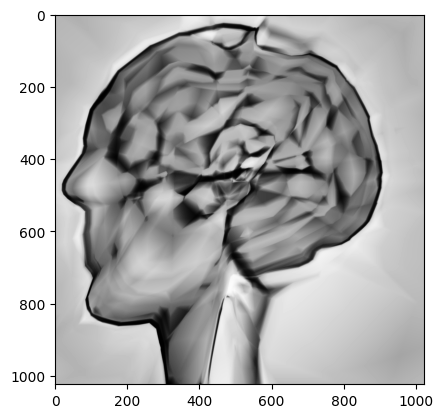

In [89]:
picture = model.predict(coordinates_array.reshape(1, 1024, 1024, 8))
plt.imshow(picture.reshape(1024,1024,1), cmap="gray")